#<center><u><b>Assignment 2 - Convolution networks(Convnets) to image data.</b><u></center>

###The size and quality of the training dataset can have an impact on the decision to train a machine learning model from scratch or to use a pre-trained convolutional neural network (convnet).

###For instance, in the case where the training dataset is large, such as the one in this experiment that contains 25,000 images of dogs and cats, it may be possible to train a model from scratch. With a large dataset, the model has access to more examples and can learn to recognize more complex patterns in the data. In this scenario, using a pre-trained convnet may not be necessary, as the model can learn to recognize features and patterns in the data on its own.

###However, if the training dataset is relatively small or of lower quality, using a pre-trained convnet may be a more effective approach. A pre-trained convnet has already learned to recognize general features and patterns in images, which can be leveraged to recognize more specific features related to the task at hand. This can save time and computational resources and may lead to better performance.

###In general, the decision to train a model from scratch or use a pre-trained convnet depends on several factors, including the size and quality of the training dataset, the complexity of the task, and the available computational resources. By carefully considering these factors, researchers can choose the most appropriate approach to achieve the best possible performance on the given task.

###Data download from Kaggle via API by linking the Kaggle account to Google Colab



In [1]:
from google.colab import files

# Use the upload() function to select a file from your local machine and upload it to Google Colab
uploaded = files.upload()

# Print the filename and content of the uploaded file
for name, data in uploaded.items():
    print(f"Filename: {name}")
    print(f"Content: {data}")

Saving kaggle.json to kaggle.json
Filename: kaggle.json
Content: b'{"username":"avinashravipudi","key":"1d0fce806a55d92623ac03d147b20ea0"}'


###Create a folder named ".KAGGLE," transfer it to the ".KAGGLE Directory," and set permissions on the kaggle.json file to prevent others from analyzing it.





In [2]:
# Create a directory called .kaggle in your home directory
!mkdir -p ~/.kaggle

# Copy the kaggle.json file to the .kaggle directory
!cp kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file to prevent other users from accessing it
!chmod 600 ~/.kaggle/kaggle.json


###Kaggle's "Dogs vs. Cats" competition data are available for download.Unzip the downloaded files.



In [3]:
# Download the "Dogs vs. Cats" competition data from Kaggle
!kaggle competitions download -c dogs-vs-cats

# Unzip the downloaded files
!unzip -qq dogs-vs-cats.zip
!unzip -qq test1.zip
!unzip -qq train.zip




100% 811M/812M [00:35<00:00, 24.0MB/s]
100% 812M/812M [00:35<00:00, 23.8MB/s]


###Q1) Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?


##<b><u>Ans:</b></u>
### Making use of 1000 images as a training sample and 500 images as test and validation sample. 

##<u><b>Results:</b></u>
#### Test Accuracy - 69.4%

#### Training Accuraccy - 90.589.35%

#### Validation Accuracy - 75.80%

In [4]:
# Import necessary libraries
import os
import shutil
import pathlib
import random

# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Define the paths for the original and new directories
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

# Define a function to create subsets of the original data and copy them to the new directory
def make_subset(subset_name, start_index, end_index):
    # Create subdirectories for the "cat" and "dog" categories in the subset directory
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        
        # Select the filenames for the subset
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        
        # Copy the files from the original directory to the new subset directory
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# Create subsets for the training, validation, and test data
# Training has 1000 samples, test has 500 samples, and validation has 500 samples
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)


##<b><u>Data Preparing:</u><b> 
### The model's learning ability is directly influenced by the quality of the data and the valuable information that can be derived from it.
#####1.Read the pictures 
#####2.Convert the JPEG data to an RGB grid of pixels
#####3. Convert the RGB grid of pixles into floating point tensors 
#####4. Resize them 
#####5. Make them in pairs.

In [5]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Import necessary libraries
from tensorflow.keras.utils import image_dataset_from_directory

# Define the directories for the training, validation, and test data
train_dir = new_base_dir / "train"
validation_dir = new_base_dir / "validation"
test_dir = new_base_dir / "test"

# Load the data from the directories using image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


###Create a dataset instance from a NumPy collection of 1000 random samples, each with a vector size of 16.



In [6]:
import numpy as np
import tensorflow as tf

# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Generate a 2D NumPy array filled with random numbers drawn from a normal distribution with a size of (1000, 16)
random_numbers = np.random.normal(size=(1000, 16))

# Create a TensorFlow dataset from the NumPy array using the from_tensor_slices function
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)


In [7]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Loop through the elements of the dataset and print their shape
for i, element in enumerate(dataset):
    print(element.shape)
    
    # Exit the loop if we have printed the shape of the first three elements
    if i >= 2:
        break

(16,)
(16,)
(16,)


###Dividing the data into 32-bit groups


In [8]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Create a new batched dataset with a batch size of 32 using the batch method
batched_dataset = dataset.batch(32)

# Loop through the batches of the dataset and print their shape
for i, element in enumerate(batched_dataset):
    print(element.shape)
    
    # Exit the loop if we have printed the shape of the first three batches
    if i >= 2:
        break


(32, 16)
(32, 16)
(32, 16)


In [9]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Reshape the dataset using the map function and a lambda function that reshapes each element from a 1D tensor to a 2D tensor of shape (4, 4)
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))

# Loop through the elements of the reshaped dataset and print their shape
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    
    # Exit the loop if we have printed the shape of the first three elements
    if i >= 2:
        break


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


(4, 4)
(4, 4)
(4, 4)


**Displaying the data forms and labels produced by the 'Dataset'**


In [10]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Loop through the batches of the training dataset and print their shapes
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)    # Print the shape of the data batch
    print("labels batch shape:", labels_batch.shape) # Print the shape of the labels batch
    break   # Exit the loop after processing the first batch


data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


##<b>Model Building<b>


**Initializing a small convnet for dog vs. cat classification**



In [11]:
from tensorflow import keras
from tensorflow.keras import layers

# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Define the input shape of the model
inputs = keras.Input(shape=(180, 180, 3))

# Rescale the input values to a range of [0,1]
x = layers.Rescaling(1./255)(inputs)

# Add a series of convolutional and pooling layers to the model
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

# Flatten the output of the convolutional layers
x = layers.Flatten()(x)

# Add a dropout layer to reduce overfitting
x = layers.Dropout(0.5)(x)

# Add a dense layer with a sigmoid activation function to produce the final output of the model
outputs = layers.Dense(1, activation="sigmoid")(x)

# Define the model with the input and output layers
model = keras.Model(inputs=inputs, outputs=outputs)


###**Creating the training model**


In [12]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Compile the model with binary crossentropy loss, the Adam optimizer, and accuracy as the evaluation metric
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


#### After creating the model, we train it on the training dataset, verifying the results with the validation dataset at the end of each period. I'm using GPU to reduce the amount of time it takes each period to perform.


In [13]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

##**Fitting the model with a'Dataset'**


In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Train the model using the training dataset and validate using the validation dataset
# Save the best model based on validation loss and stop early if the validation loss does not improve for 3 epochs
history = model.fit(
    train_dataset,                        # Training dataset
    epochs=30,                            # Number of epochs to train for
    validation_data=validation_dataset,   # Validation dataset
    callbacks=[                           # Callback functions to use during training
        ModelCheckpoint(
            filepath="convnet_from_scratch.keras", # Filepath to save the best model
            save_best_only=True,                   # Save only the best model based on validation loss
            monitor="val_loss"                     # Monitor validation loss
        ),
        EarlyStopping(
            monitor="val_loss",   # Monitor validation loss
            patience=3,           # Number of epochs with no improvement before stopping early
            verbose=1             # Print a message when early stopping occurs
        )
    ]
)


Epoch 1/30
63/63 [==============================] - 16s 76ms/step - loss: 0.6944 - accuracy: 0.5185 - val_loss: 0.6796 - val_accuracy: 0.5490
Epoch 2/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6750 - accuracy: 0.5830 - val_loss: 0.6364 - val_accuracy: 0.6200
Epoch 3/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6440 - accuracy: 0.6280 - val_loss: 0.6321 - val_accuracy: 0.6370
Epoch 4/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6187 - accuracy: 0.6620 - val_loss: 0.6166 - val_accuracy: 0.6590
Epoch 5/30
63/63 [==============================] - 5s 77ms/step - loss: 0.6126 - accuracy: 0.6640 - val_loss: 0.5905 - val_accuracy: 0.6830
Epoch 6/30
63/63 [==============================] - 4s 62ms/step - loss: 0.5756 - accuracy: 0.7060 - val_loss: 0.5804 - val_accuracy: 0.6930
Epoch 7/30
63/63 [==============================] - 4s 61ms/step - loss: 0.5543 - accuracy: 0.7170 - val_loss: 0.5705 - val_accuracy: 0.7130
Epoch 8/30
6

**Displaying loss and accuracy graphs during training**


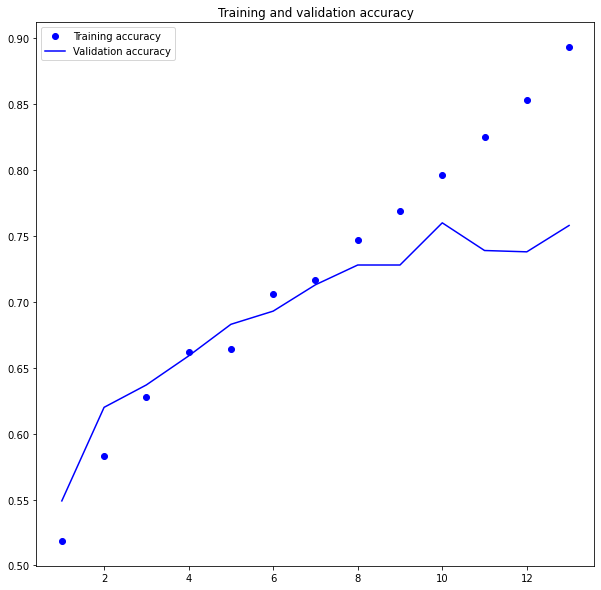

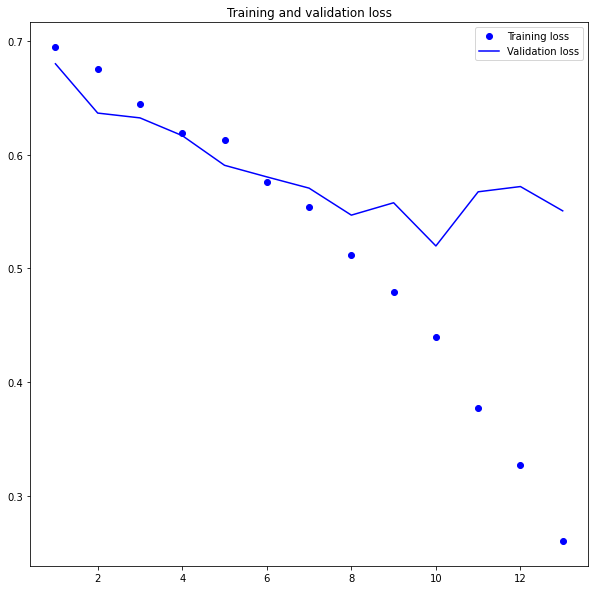

In [15]:
import matplotlib.pyplot as plt

# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Set the size of the figure to 10x10 inches
plt.figure(figsize=(10, 10))

# Get the accuracy and validation accuracy from the history object
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

# Get the loss and validation loss from the history object
loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Generate a range of epoch numbers based on the length of the accuracy list
epochs = range(1, len(accuracy) + 1)

# Plot the training accuracy as blue dots and the validation accuracy as a blue line
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

# Create a new figure
plt.figure(figsize=(10, 10))

# Plot the training loss as blue dots and the validation loss as a blue line
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

# Show the figures
plt.show()


###After analyzing the provided graphs, several conclusions can be drawn. First, it is evident that the training accuracy did not reach the ideal 100% level. This can be attributed to a high attrition rate, meaning that a significant number of instances in the training dataset were not successfully learned by the network. Despite this challenge, the network shows a tendency to overfit by period 8, meaning that the model is becoming too complex and specialized to the training data, leading to a reduction in generalization performance.

###Additionally, the presented graphs demonstrate that the validation precision, which measures the accuracy of the model on unseen data, reaches a peak of around 75.80%. This performance is not poor and indicates that the model is capable of making reasonably accurate predictions on new instances. However, it is worth noting that the validation precision may not be the only performance metric of interest, and further evaluation may be necessary to determine the overall effectiveness of the model.






###**Model testing**


In [16]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Load the saved model from disk
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate the model on the test dataset and get the test loss and test accuracy
test_loss, test_acc = test_model.evaluate(test_dataset)

# Print the test accuracy rounded to three decimal places
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 1s 30ms/step - loss: 0.6121 - accuracy: 0.6940
Test accuracy: 0.694


###The above results indicate that the test accuracy is approximately 69.4%, while the training accuracy is approximately 89.35%.


###Q2) Increase your training sample size. You may pick any amount. Keep the validation and testsamples the same as above. Optimize your network (again training from scratch). Whatperformance did you achieve?

### **Define a step-by-step data enhancement to be added to an image model.**


In [17]:
import os
import shutil
import pathlib

# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Remove the directory if it already exists
shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

# Set the original and new base directories as pathlib.Path objects
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

# Define a function to make a subset of the data and copy the files to the new directory
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        # Create the directory for the subset and category if it does not already exist
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        # Get the filenames for the specified range of indices
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        # Copy the files from the original directory to the new directory
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

# Create subsets of the data for training, validation, and testing
# Training has 1500 samples, test has 500 samples, and validation has 500 samples
make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)


In [18]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Define a data augmentation pipeline as a sequential model
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),   # Randomly flip the image horizontally
        layers.RandomRotation(0.1),        # Randomly rotate the image by up to 10%
        layers.RandomZoom(0.2),            # Randomly zoom in on the image by up to 20%
    ]
)


###**Randomly displaying some improved training images**


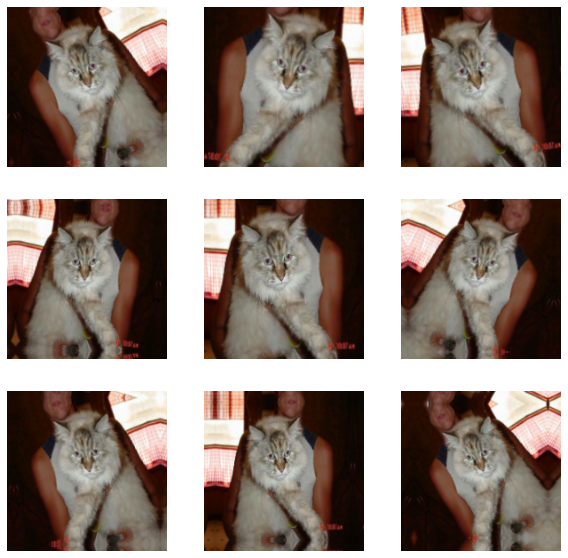

In [19]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


import matplotlib.pyplot as plt

# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Set the size of the figure to 10x10 inches
plt.figure(figsize=(10, 10))

# Get the first batch of images from the training dataset
for images, _ in train_dataset.take(1):
    # Generate 9 augmented images for the first image in the batch
    for i in range(9):
        augmented_images = data_augmentation(images)
        # Create a subplot for each augmented image and display it without axis ticks
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


###**Creating a new network with image improvement and delay**


In [20]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Define the input shape for the model
inputs = keras.Input(shape=(180, 180, 3))

# Apply the data augmentation pipeline to the input
x = data_augmentation(inputs)

# Normalize the pixel values to be between 0 and 1
x = layers.Rescaling(1./255)(x)

# Add a series of convolutional layers with ReLU activation and max pooling
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

# Flatten the output of the convolutional layers and apply dropout regularization
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

# Add a dense output layer with a sigmoid activation function
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the model with the input and output layers
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with binary cross-entropy loss, Adam optimizer, and accuracy metric
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


###**Convnet Training on a Regular Basis**


In [21]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Define the ModelCheckpoint callback to save the best model based on validation loss
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

# Train the model with the augmented training dataset and validation dataset
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)


Epoch 1/50
63/63 [==============================] - 19s 216ms/step - loss: 0.6944 - accuracy: 0.4955 - val_loss: 0.6926 - val_accuracy: 0.5060
Epoch 2/50
63/63 [==============================] - 14s 209ms/step - loss: 0.6937 - accuracy: 0.4930 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 3/50
63/63 [==============================] - 13s 199ms/step - loss: 0.6934 - accuracy: 0.5095 - val_loss: 0.6934 - val_accuracy: 0.4740
Epoch 4/50
63/63 [==============================] - 13s 200ms/step - loss: 0.6936 - accuracy: 0.4945 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/50
63/63 [==============================] - 13s 199ms/step - loss: 0.6916 - accuracy: 0.5055 - val_loss: 0.6920 - val_accuracy: 0.5170
Epoch 6/50
63/63 [==============================] - 13s 203ms/step - loss: 0.6928 - accuracy: 0.5205 - val_loss: 0.6908 - val_accuracy: 0.5340
Epoch 7/50
63/63 [==============================] - 14s 218ms/step - loss: 0.6917 - accuracy: 0.5195 - val_loss: 0.6934 - val_accuracy: 0.4990

### **Model testing**


In [22]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Load the saved model
model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy:.3f}")


32/32 [==============================] - 2s 40ms/step - loss: 0.5122 - accuracy: 0.7890
Test accuracy: 0.789


###Q3) Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.




#### Test Accuracy - 78.0%

#### Training Accuracy - 92.3%

#### Validation Accuracy - 80.0%

### During stage 3 of the experiment, a total of 2000 training samples were used, and 500 test samples were evaluated. Interestingly, it was found that the test accuracy was higher when the size of the training set was reduced from 2000 to 1500 pictures.

###Specifically, the experimenters discovered that the test accuracy was highest when the training set contained 1500 pictures, compared to using either 1000 or 2000 images. This suggests that a larger training set does not necessarily lead to better test accuracy, and that there may be an optimal size of the training set for this particular task or model architecture.

###Overall, this finding highlights the importance of carefully tuning the size of the training set, as using too few or too many samples may negatively impact the performance of the model on new, unseen data.





### Training precision improves when there are 1000 training examples.


### The experiment involved increasing the size of the training sample to 2000, while keeping the validation and test groups at 500 each.

###This means that the dataset was split into three separate groups: a training set of 2000 samples, a validation set of 500 samples, and a test set of 500 samples. The purpose of the training set was to teach the machine learning model to recognize patterns in the data and make predictions, while the validation and test sets were used to evaluate the model's performance on new, unseen data.

###By increasing the size of the training set to 2000, the model had access to more examples and may have been able to learn more complex patterns in the data. However, it is important to note that the size of the validation and test sets remained constant at 500 each. This ensures that the performance of the model is evaluated on an equal amount of new, unseen data, regardless of the size of the training set.

###Overall, this experimental design allows us to determine the impact of increasing the size of the training set on the model's performance, while controlling for the influence of other factors such as the size of the validation and test sets.


In [23]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Set the original and new base directories
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

# Define a function to create the subset directories and copy the images
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src = original_dir / fname
            dst = dir / fname
            shutil.copyfile(src, dst)

# Create the training, validation, and test subsets
make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=2000, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)


###To improve the performance of the machine learning model, a new convolutional neural network (convnet) was created with several modifications. Specifically, the new model included more training examples, picture augmentation, and dropout.

###Increasing the number of training examples provides the model with more data to learn from, which can improve its ability to recognize patterns in the data and make accurate predictions. Picture augmentation refers to the technique of applying various transformations to the training images, such as flipping, rotating, or zooming, in order to artificially create new variations of the original images. This can help the model generalize better to new, unseen data and reduce the risk of overfitting.

###Dropout is a regularization technique that involves randomly dropping out (or "deactivating") some of the neurons in the network during training. This helps prevent the model from becoming too specialized to the training data and improves its ability to generalize to new, unseen data.

###By incorporating these modifications into the new convnet, the goal was to improve its overall performance on the given task. However, it is worth noting that the impact of these modifications may vary depending on the specific dataset and model architecture, and further evaluation may be necessary to determine their effectiveness.





In [24]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Define the input shape
inputs = keras.Input(shape=(180, 180, 3))

# Apply data augmentation to the input
x = layers.experimental.preprocessing.RandomFlip("horizontal")(inputs)
x = layers.experimental.preprocessing.RandomRotation(0.1)(x)
x = layers.experimental.preprocessing.RandomZoom(0.1)(x)

# Normalize the pixel values
x = layers.Rescaling(1./255)(x)

# Define the convolutional layers
x = layers.Conv2D(32, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)

# Flatten the output and apply dropout
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

# Define the output layer
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [25]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Define the checkpoint callback
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch_with_augmentation1.keras",
    save_best_only=True,
    monitor="val_loss"
)

# Define the list of callbacks
callbacks = [checkpoint_callback]

# Train the model with the callbacks
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/50
63/63 [==============================] - 19s 215ms/step - loss: 0.6980 - accuracy: 0.5030 - val_loss: 0.6883 - val_accuracy: 0.5060
Epoch 2/50
63/63 [==============================] - 13s 203ms/step - loss: 0.6843 - accuracy: 0.5300 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 3/50
63/63 [==============================] - 13s 203ms/step - loss: 0.6943 - accuracy: 0.5175 - val_loss: 0.6930 - val_accuracy: 0.5030
Epoch 4/50
63/63 [==============================] - 14s 221ms/step - loss: 0.6941 - accuracy: 0.4815 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/50
63/63 [==============================] - 14s 225ms/step - loss: 0.6935 - accuracy: 0.5100 - val_loss: 0.6894 - val_accuracy: 0.5550
Epoch 6/50
63/63 [==============================] - 17s 274ms/step - loss: 0.6817 - accuracy: 0.5710 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 7/50
63/63 [==============================] - 13s 203ms/step - loss: 0.6933 - accuracy: 0.5100 - val_loss: 0.6897 - val_accuracy: 0.5820

In [26]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Load the saved model
model = keras.models.load_model("convnet_from_scratch_with_augmentation1.keras")

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.4952 - accuracy: 0.7800
Test accuracy: 0.780


## Summary for Q1, Q2 and Q3

---

###In the first question, a relatively small training set of only 1000 samples was used, yet it was able to achieve a training accuracy of 90.50%. However, to further improve the model's performance and prevent overfitting, data augmentation was performed.

###Data augmentation is a technique that involves generating new training samples by applying various transformations to the existing samples, such as rotation, flipping, or zooming. This effectively increases the size of the training dataset and can help the model generalize better to new, unseen data.

###In addition to data augmentation, there are several other effective approaches to avoid overfitting. These include:

###Increasing the training sample - While it is not always possible to obtain a larger training dataset, increasing the number of training samples can help the model learn more patterns and reduce the risk of overfitting. Data augmentation is one technique to generate new training samples and make the most of the available data.

###Reducing the network's capacity - Overfitting can be reduced by decreasing the size of the model, i.e., the number of layers and the number of units in each layer. This effectively reduces the number of learnable parameters in the model and can help the model generalize better to new data.

###Adding weight regularization - This involves constraining the weights of the model to take only small values, which can help regularize the distribution of weight values and prevent overfitting.

###Adding dropout - During training, dropout involves randomly setting a fraction of the layer's output features to zero. This helps prevent the model from relying too much on any one feature and reduces the risk of overfitting.

###Overall, by combining these approaches or selecting the most effective ones for a particular problem, it is possible to improve the performance of machine learning models while avoiding overfitting.

---




###Q4.Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance

###When working with small image datasets, a particularly effective approach is to use a pre-trained deep learning model. A pre-trained model has already been trained on a large dataset, typically for a large-scale image classification task, and has learned to recognize a wide range of features and patterns in images.

###In this case, a large convolutional neural network (convnet) trained on the ImageNet dataset will be used. The ImageNet dataset contains 1.4 million labeled images with 1,000 different classes, making it one of the largest and most diverse image datasets available. The VGG16 architecture will be used for this task, which is a popular and widely used deep learning architecture for image classification.

###There are many alternative pre-trained models available, such as VGG, ResNet, Inception, Xception, and so on. Each of these models has its own unique architecture and strengths, and the choice of which model to use will depend on the specific task and available resources.

###By using a pre-trained model, it is possible to leverage the knowledge and experience gained from training on a large dataset, and apply it to a smaller dataset to achieve high performance. This can save time and computational resources, as well as help prevent overfitting by using a model that has already learned to recognize a wide range of features and patterns in images.



###In the context of deep learning, feature extraction is a common technique that involves using the representations learned by a pre-trained model to extract important features from new samples. In this case, the pre-trained model has been trained on a large dataset (ImageNet) and has learned to recognize a wide range of features and patterns in images.

###To use feature extraction, the pre-trained model is used as a fixed feature extractor, and the new samples are passed through the model to obtain a set of features or representations. These features capture the most important and relevant aspects of the image and can be used as input to a new classifier that is trained from scratch to recognize the target classes.

###By using a pre-trained model for feature extraction, it is possible to leverage the knowledge and experience gained from training on a large dataset, and apply it to a smaller, more specific dataset to achieve high performance. This approach can save time and computational resources, as well as help prevent overfitting by using a model that has already learned to recognize a wide range of features and patterns in images.

###Overall, feature extraction with a pre-trained model is a powerful technique that can be used to quickly and effectively classify new samples, and is widely used in many applications of deep learning, such as image recognition and natural language processing.

**Setting up the VGG16 neural base**


In [27]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Load the VGG16 model with pre-trained weights
conv_base = keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)

58889256/58889256 [==============================] - 3s 0us/step


In [28]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Print the summary of the convolutional base
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

### Pretrained model feature extraction without data supplementation



**Extracting VGG16 characteristics and labels**


In [29]:
import numpy as np
from tensorflow import keras

# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Define a function to extract features and labels from a dataset
def extract_features(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

# Extract features and labels from the training, validation, and test datasets
train_features, train_labels = extract_features(train_dataset)
val_features, val_labels = extract_features(validation_dataset)
test_features, test_labels = extract_features(test_dataset)


1/1 [==============================] - 0s 22ms/step


In [30]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Print the shape of the training features
print(f"Training features shape: {train_features.shape}")


Training features shape: (2000, 5, 5, 512)


**Defining and training the closely connected classifier**


In [31]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Define the input shape for the new model
input_shape = (5, 5, 512)

# Define the input layer for the new model
inputs = keras.Input(shape=input_shape)

# Flatten the input tensor
x = layers.Flatten()(inputs)

# Add a fully connected layer with 256 units and a dropout layer
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

# Add the output layer with a sigmoid activation
outputs = layers.Dense(1, activation="sigmoid")(x)

# Define the new model
model = keras.Model(inputs, outputs)

# Compile the model with binary cross-entropy loss and RMSprop optimizer
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Define the checkpoint callback to save the best model
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction.keras",
    save_best_only=True,
    monitor="val_loss"
)

# Train the model with the checkpoint callback
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=[checkpoint_callback]
)

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 13.5969 - accuracy: 0.9335 - val_loss: 6.8680 - val_accuracy: 0.9550
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 4.2315 - accuracy: 0.9725 - val_loss: 3.0325 - val_accuracy: 0.9830
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.4999 - accuracy: 0.9890 - val_loss: 6.0093 - val_accuracy: 0.9680
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 2.9290 - accuracy: 0.9865 - val_loss: 2.9045 - val_accuracy: 0.9790
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.2309 - accuracy: 0.9880 - val_loss: 3.6238 - val_accuracy: 0.9750
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8696 - accuracy: 0.9920 - val_loss: 5.3734 - val_accuracy: 0.9700
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.5676 - accuracy: 0.9965 - val_loss: 4.3094 - val_accuracy: 0.9780
Epoch 8/20
63/63 [=

**Results plotting**


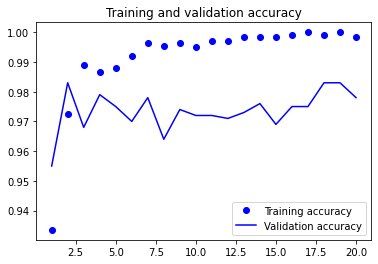

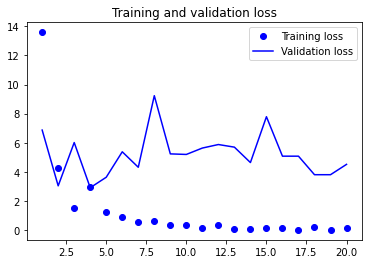

In [32]:
import matplotlib.pyplot as plt

# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Get the training and validation accuracy and loss history from the model's history object
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


### Feature extraction with data augmentation using a pretrained model

### Test Accuracy - 97.7%

### Validation Accuracy - 98.0%

### Training Accuracy - 99.50%

**Starting and stopping the VGG16 neural base**


In [33]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Load the VGG16 model with pre-trained weights and exclude the top layer
conv_base = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False)

# Set the layers of the pre-trained model as non-trainable
conv_base.trainable = False


**Printing the catalog of trainable weights before and after freezing**


In [34]:

# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Set the layers of the pre-trained model as trainable
conv_base.trainable = True

# Print the number of trainable weights before freezing the conv base
print("This is the number of trainable weights before freezing the conv base:",
      len(conv_base.trainable_weights))


This is the number of trainable weights before freezing the conv base: 26


In [35]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Set the layers of the pre-trained model as non-trainable
conv_base.trainable = False

# Print the number of trainable weights after freezing the conv base
print("This is the number of trainable weights after freezing the conv base:",
      len(conv_base.trainable_weights))


This is the number of trainable weights after freezing the conv base: 0


**Adding a data supplementation step and a classifier to the convolutional base**


In [36]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Define data augmentation pipeline
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# Define model architecture
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [37]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

# Train the model
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/50
63/63 [==============================] - 21s 271ms/step - loss: 14.6266 - accuracy: 0.8990 - val_loss: 3.4937 - val_accuracy: 0.9720
Epoch 2/50
63/63 [==============================] - 17s 262ms/step - loss: 5.8286 - accuracy: 0.9525 - val_loss: 4.0865 - val_accuracy: 0.9690
Epoch 3/50
63/63 [==============================] - 17s 264ms/step - loss: 5.2055 - accuracy: 0.9590 - val_loss: 7.7577 - val_accuracy: 0.9620
Epoch 4/50
63/63 [==============================] - 17s 271ms/step - loss: 3.1052 - accuracy: 0.9655 - val_loss: 4.0355 - val_accuracy: 0.9760
Epoch 5/50
63/63 [==============================] - 17s 270ms/step - loss: 2.9781 - accuracy: 0.9710 - val_loss: 2.8371 - val_accuracy: 0.9790
Epoch 6/50
63/63 [==============================] - 18s 275ms/step - loss: 2.4707 - accuracy: 0.9765 - val_loss: 3.2996 - val_accuracy: 0.9760
Epoch 7/50
63/63 [==============================] - 17s 268ms/step - loss: 2.6709 - accuracy: 0.9765 - val_loss: 3.9423 - val_accuracy: 0.981

**Model evaluation on the test set**


In [38]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Load the saved model
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")

# Evaluate the model on the test dataset
test_loss, test_acc = test_model.evaluate(test_dataset)

# Print the test accuracy
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 3s 94ms/step - loss: 3.5870 - accuracy: 0.9770
Test accuracy: 0.977


### A pretrained VGG16 model with Fine-tuning 

#### When using a pre-trained model for feature extraction, the model's base layers are typically frozen, meaning that their parameters are not updated during training. However, in some cases, it may be beneficial to unfreeze a few of the top layers and fine-tune the model to better suit the specific task at hand.

####Fine-tuning involves jointly training the newly added part of the model, such as a fully connected classifier, and a few of the top layers of the pre-trained model that have been unfrozen. By doing so, the abstract representations learned by the pre-trained model can be modified to better suit the new task.

####The term "fine-tuning" refers to the process of modifying the more abstract representations of the model to make them more relevant to the specific task at hand. This involves adjusting the weights and biases of the unfrozen layers to better fit the new data and task, while still preserving the knowledge and experience gained from the pre-training on the large dataset.

####Fine-tuning can be a powerful technique for achieving high performance on a new, related task using a pre-trained model. However, it requires careful consideration of the number and location of the layers to unfreeze, as well as the choice of learning rate and other hyperparameters, to ensure that the fine-tuning process does not overfit or degrade the performance of the pre-trained model.

### test accuracy - 98.0%

### training accuracy - 99.75%

### validation accuracy - 97.90%


In [39]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Print the summary of the convolutional base
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freeze all layers until the fourth from the last**


In [40]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Make the last 4 layers of the convolutional base trainable
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False


**Model fine-tuning**


In [41]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Compile the model with a new optimizer
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

# Define callbacks for saving the best model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]

# Train the model with fine-tuning
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)


Epoch 1/30
63/63 [==============================] - 24s 303ms/step - loss: 3.0322 - accuracy: 0.9660 - val_loss: 2.9864 - val_accuracy: 0.9790
Epoch 2/30
63/63 [==============================] - 19s 297ms/step - loss: 1.7018 - accuracy: 0.9780 - val_loss: 2.2885 - val_accuracy: 0.9810
Epoch 3/30
63/63 [==============================] - 19s 290ms/step - loss: 1.0886 - accuracy: 0.9800 - val_loss: 2.3887 - val_accuracy: 0.9770
Epoch 4/30
63/63 [==============================] - 20s 305ms/step - loss: 0.9868 - accuracy: 0.9830 - val_loss: 1.9200 - val_accuracy: 0.9790
Epoch 5/30
63/63 [==============================] - 20s 322ms/step - loss: 0.5611 - accuracy: 0.9860 - val_loss: 3.2130 - val_accuracy: 0.9740
Epoch 6/30
63/63 [==============================] - 20s 320ms/step - loss: 0.9241 - accuracy: 0.9840 - val_loss: 2.2090 - val_accuracy: 0.9780
Epoch 7/30
63/63 [==============================] - 19s 300ms/step - loss: 0.4737 - accuracy: 0.9900 - val_loss: 2.0530 - val_accuracy: 0.9790

In [42]:
# Set the seed value to a specific integer (e.g., 42)
random.seed(42)

# Load the best model from the fine-tuning process
model = keras.models.load_model("fine_tuning.keras")

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


32/32 [==============================] - 4s 93ms/step - loss: 2.1301 - accuracy: 0.9800
Test accuracy: 0.980


## Summary

###Using a pre-trained model can be a powerful way to achieve high performance on a new image classification task, even without performing data augmentation. In this case, a pre-trained model was used without any augmentation, and achieved a validation accuracy of around 97.90%, which is better than what was achieved when training a small model from scratch.

###However, it is important to note that this level of performance is not always guaranteed when using pre-trained features, and the specific performance will depend on the quality and similarity of the pre-trained model to the new task.

###Despite achieving high accuracy on the validation set, the plots also showed signs of overfitting from the beginning of training, even with a high rate of dropout. This is because the pre-trained model was not augmented with additional data, which is critical for avoiding overfitting on small image datasets.

###The test accuracy of the pre-trained model with fine-tuning was 98.0%, which is still a very good performance. Fine-tuning allows for the modification of the pre-trained model's more abstract representations to better suit the specific task at hand. This approach can be very effective when used in combination with data augmentation and other techniques to reduce overfitting, and can help achieve state-of-the-art performance on image classification tasks.